## 오차역전파 (Backpropagation)


<br>

<br>


### 오차역전파 알고리즘
- **학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함**

- **각 layer별로 역전파학습을 위해 중간값을 저장**

- **손실함수를 학습 파라미터(가중치, 편향)로 미분하여  
  마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  각 layer를 통과할 때마다 저장된 값을 이용**

- **오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신**


<br>

<br>

### 오차역전파 학습의 특징
- **손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에  
  학습 소요시간이 매우 단축!**

- 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용


<br>

<br>

### 신경망 학습에 있어서 미분가능의 중요성
- 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값,  
  즉, 최적값을 찾기 위한 방법으로 미분을 활용

- 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여  
  모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)

<sub>출처: https://www.pinterest.co.kr/pin/424816177350692379/</sub>

<br>

<br>

### 합성함수의 미분 (연쇄법칙, chain rule)

## $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  
 

- 여러 개 연속으로 사용가능  
  ## $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x}$
- 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)
<sub>출처: https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/</sub>

- **오차역전파의 직관적 이해**
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음



<br>

#### 합성함수 미분(chain rule) 예제

![](https://miro.medium.com/max/1000/1*azqHvbrNsZ8AIZ7H75tbIQ.jpeg)

<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

  #### $\quad a=-1, \ b=3, \ c=4$,
  
  #### $\quad x = a + b, \ y = b + c, \ f = x * y \ 일 때$    



  ### $\quad \begin{matrix}\frac{\partial f}{\partial x} &=& y\ + \ x \ \frac{\partial y}{\partial x} &=& (b \ + \ c) \ + \ (a \ +\ b)\ \times \ 0 &=& 7 \end{matrix}$

  ### $\quad \begin{matrix}\frac{\partial f}{\partial y} &=& x\ + \ \frac{\partial x}{\partial y} \ y &=& (a \ + \ b) \ + \ 0 \times (b \ +\ c) &=& 2 \end{matrix}$

   <br>

  ### $ \quad \begin{matrix} \frac{\partial x}{\partial a} &=& 1 \ + \ a \ \frac{\partial b}{\partial a} &=& 1 \end{matrix} $
  ### $ \quad \begin{matrix} \frac{\partial y}{\partial c} &=& \frac{\partial b}{\partial c}\ + 1 &=& 1 \end{matrix} $
  
  <br>

  ### $ \quad \begin{matrix} \frac{\partial f}{\partial a} &=& \frac{\partial f}{\partial x} \times \frac{\partial x}{\partial a} &=& y \times 1 &=& 7 \times 1 = 7 &=& 7  \end{matrix} $
    
  ### $ \quad \begin{matrix} \frac{\partial f}{\partial b}\ &=& \frac{\partial x}{\partial b} \ y \ + \ x \ \frac{\partial y}{\partial b} &=& 1 \times 7 + 2 \times 1 &=& 9 \end{matrix} $
  

  
  

<br>

<br> 

### 덧셈, 곱셈 계층의 역전파
- 위 예제를 통해 아래 사항을 알 수 있음

  #### 1. $\quad z = x + y$ 일 때,
  ## $\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1 $

  #### 2. $\quad t = xy$ 일 때,
  ## $\frac{\partial t}{\partial x} = y, \frac{\partial t}{\partial y} = x$


In [1]:
class Mul():
  
  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    result = x * y
    return result

  def backward(self, dresult):
    dx = dresult * self.x
    dy = dresult * self.y
    return dx, dy

In [2]:
class Add():

  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    result = x + y
    return result
  
  def backward(self, dresult):
    dx = dresult * 1
    dy = dresult * 1
    return dx, dy

In [3]:
a, b, c = -1, 3, 4
x = Add()
y = Add()
f = Mul()

In [4]:
x_result = x.forward(a, b)
y_result = y.forward(b, c)

print(x_result)
print(y_result)
print(f.forward(x_result, y_result))

2
7
14


In [6]:
dresult = 1
dx_mul, dy_mul = f.backward(dresult)

da_add, db_add_1 = x.backward(dx_mul)
db_add_2, dc_add = y.backward(dy_mul)

print(dx_mul, dy_mul)
print(da_add)
print(db_add_1 + db_add_2)
print(dc_add)

2 7
2
9
7


![](https://miro.medium.com/max/2000/1*U3mVDYuvnaLhJzIFw_d5qQ.png)
<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

<br>

<br>

### 활성화 함수(Activation)에서의 역전파

<br>

#### 시그모이드(Sigmoid) 함수

![](https://media.geeksforgeeks.org/wp-content/uploads/20190911181329/Screenshot-2019-09-11-18.05.46.png)

<sub>출처: https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/</sub>

- 수식 
  ## $\quad y = \frac{1}{1 + e^{-x}}$일 때,

  ### $\quad \begin{matrix}y' &=& (\frac{1}{1 + e^{-x}})' &=& \frac{-1}{(1 + e^{-x})^2}\ \times \ (-e^{-x}) &=& \frac{1}{1 + e^{-x}} \ \times \ \frac{e^{-x}}{1 + e^{-x}} &=& \frac{1}{1 + e^{-x}} \ \times \ (1 - \frac{1}{1 + e^{-x}}) &=& y\ (1\ - \ y) \end{matrix}$

In [8]:
class Sigmoid():

  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.dout
    return dx

<br>

#### ReLU 함수

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)

<sub>출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/</sub>


- 수식  

  ### $\qquad y= \begin{cases} x & (x \ge 0)  \\ 0 & (x < 0) \end{cases}$ 일 때,

  <br>

  ### $\qquad \frac{\partial y}{\partial x}=\begin{cases} 1 & (x \ge 0) \\ 0 & (x < 0) \end{cases}$

In [9]:
class ReLU():

  def __init__(self):
    self.out = None

  def forward(self, x):
    self.mask = (x < 0)
    out = x.copy()
    out[x < 0] = 0
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

<br>

<br>

### 행렬 연산에 대한 역전파

# $\qquad Y = X \bullet W + B$

<br>

#### 순전파(forward)
  
  - 형상(shape)을 맞춰줘야함
  - 앞서 봤던 곱셈, 덧셈 계층을 합친 형태

In [10]:
import numpy as np

X = np.random.rand(3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(3,)
(3, 2)
(2,)


In [11]:
Y = np.dot(X, W) + B
print(Y.shape)

(2,)


<br>

#### 역전파(1)

##  $\  Y = X \bullet W$
- $X :\ \ (2,\ )$

- $W :\ \ (2,\ 3)$

- $X \bullet W :\ \ (3,\ )$

- $\frac{\partial L}{\partial Y} :\ \ (3,\ )$

- $\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\bullet W^T ,\ (2,\ )$

- $\frac{\partial L}{\partial W} = X^T \bullet \frac{\partial L}{\partial Y} ,\ (2,\ 3)$



In [13]:
X = np.random.randn(2)
W = np.random.randn(2, 3)
Y = np.dot(X, W)

print("X\n{}".format(X))
print("W\n{}".format(W))
print("Y\n{}".format(Y))

X
[-0.5830943   0.34780397]
W
[[-0.04832234  1.13401371  0.35730512]
 [-0.15687809 -0.32506044 -1.08785022]]
Y
[-0.02638634 -0.77429425 -0.58670121]


In [14]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))

In [15]:
print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))

dL_dY
[-1.00968556  1.16542495 -0.70442471]
dL_dX
[1.11870369 0.54587257]
dL_dW
[[ 0.58874189 -0.67955265  0.41074604]
 [-0.35117265  0.40533943 -0.24500171]]


<br>

#### 역전파(2)

## $\ (2)\  Y = X \bullet W + B$
- $X, W$는 위와 동일

- $B: \ (3, )$

- $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}, \ (3,\ )$

In [16]:
X = np.random.randn(2)
W = np.random.randn(2, 3)
B = np.random.randn(3)
Y = np.dot(X, W) + B
print(Y)

[-0.49360549  2.0161915   0.17536917]


In [18]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))
dL_dB = dL_dY

In [19]:
print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_dB\n{}".format(dL_dB))

dL_dY
[-1.20575903 -2.52301434 -0.63209045]
dL_dX
[-0.22854657 -3.17884156]
dL_dW
[[ 1.49286269  3.12377006  0.7825977 ]
 [-2.10027179 -4.39475525 -1.10101745]]
dL_dB
[-1.20575903 -2.52301434 -0.63209045]


<br>

#### 배치용 행렬 내적 계층
- N개의 데이터에 대해,  
# $\qquad Y = X \bullet W + B$

  - $X : \quad  (N,\ 3)$

  - $W : \quad  (3,\ 2)$

  - $B : \quad  (2,\ )$
  

In [20]:
X = np.random.rand(4, 3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(4, 3)
(3, 2)
(2,)


In [21]:
print("X\n{}".format(X))
print("Y\n{}".format(W))
print("B\n{}".format(B))

X
[[0.7723936  0.45398278 0.52177205]
 [0.34132359 0.16285718 0.16960506]
 [0.84527307 0.47255506 0.33008828]
 [0.59856319 0.23257503 0.45815174]]
Y
[[0.13670213 0.23586307]
 [0.29178883 0.97638063]
 [0.92887856 0.58437673]]
B
[0.07669382 0.9035604 ]


In [22]:
Y = np.dot(X, W) + B

print("Y\n{}".format(Y))
print("Y.shape :", Y.shape)

Y
[[0.79941164 1.83391097]
 [0.32841589 1.24218987]
 [0.63674266 1.75721862]
 [0.65194881 1.53955433]]
Y.shape : (4, 2)


In [23]:
dL_dY = np.random.randn(4, 2)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.T, dL_dY)
dL_dB = np.sum(dL_dY, axis=0)

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_dB\n{}".format(dL_dB))

dL_dY
[[ 1.08619261 -0.04340185]
 [ 0.70077913 -0.21591377]
 [-1.59931559 -0.83469241]
 [ 0.7433741  -0.19595051]]
dL_dX
[[ 0.13824795  0.27456214  0.983578  ]
 [ 0.04487191 -0.0063345   0.52476373]
 [-0.41550296 -1.28163993 -1.97334479]
 [ 0.05540333  0.02558597  0.57599535]]
dL_dW
[[ 0.17125865 -0.93005155]
 [ 0.02436524 -0.49487812]
 [ 0.49826345 -0.42456319]]
dL_dB
[ 0.93103025 -1.28995854]


In [24]:
class Layer():

  def __init__(self):
    self.W = np.random.randn(3, 2)
    self.b = np.random.randn(2)
    self.x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)
    return dx

In [25]:
np.random.seed(111)

layer = Layer()

In [27]:
X = np.random.rand(2, 3)
Y = layer.forward(X)

print(X)
print(Y)

[[0.62124292 0.27425353 0.46622141]
 [0.11836775 0.07395756 0.90077418]]
[[-0.72028765 -0.42708303]
 [-0.79208707 -0.74881642]]


In [28]:
dout = np.random.rand(2, 2)
dout_dx = layer.backward(dout)

print(dout_dx)

[[-0.57717814  0.8894841  -1.01146255]
 [-0.5434705   0.86783399 -1.09728643]]


<br>

<br>

### MNIST 분류 with 역전파


<br>

#### Modules Import

In [104]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from collections import OrderedDict

<ipython-input-104-c57f2278ab4a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<br>

#### 데이터 로드

In [109]:
np.random.seed(42)

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_classes = 10

<br>

#### 데이터 전처리

In [110]:
X_train, X_test = X_train.reshape(-1, 28 * 28).astype(np.float32), X_test.reshape(-1, 28 * 28).astype(np.float32)

X_train /= .255
X_test /= .255

y_train = np.eye(num_classes)[y_train]

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000,)


<br>

#### Hyper Parameters

In [112]:
epochs = 1000
lr = 1e-3
batch_size = 100
train_size = X_train.shape[0]

<br>

#### Util Functions

In [113]:
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.sum(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

  x = x - np.max(x)
  return np.exp(x) / np.sum(np.exp(x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * np.sum((pred_y - true_y)**2)

def cross_entropy_error(pred_y, true_y):
  if pred_y.ndim == 1:
    true_y = true_y.reshape(1, true_y.size)
    pred_y = pred_y.reshape(1, pred_y.size)

  if true_y.size == pred_y.size:
    true_y = true_y.argmax(axis=1)

  batch_size = pred_y.shape[0]
  return -np.sum(np.log(pred_y[np.arange(batch_size), true_y] + 1e-7)) / batch_size

def softmax_loss(X, true_y):
  pred_y = softmax(X)

  return cross_entropy_error(pred_y, true_y)

<br>

#### Util Classes

<br>

##### ReLU

In [114]:
class ReLU():

  def __init__(self):
    self.out = None

  def forward(self, x):
    self.mask = (x < 0)
    out = x.copy()
    out[x<0] = 0
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

<br>

##### Sigmoid

In [115]:
class Sigmoid():

  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.dout
    return dx

<br>

##### Layer

In [116]:
class Layer():

  def __init__(self, W, b):
    self.W = W
    self.b = b

    self.x = None
    self.origin_x_shape = None

    self.dL_dW = None
    self.dL_db = None

  def forward(self, x):
    self.origin_x_shape = x.shape

    x = x.reshape(x.shape[0], -1)
    self.x = x
    out = np.dot(self.x, self.W) + self.b

    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dL_dW = np.dot(self.x.T, dout)
    self.dL_db = np.sum(dout, axis=0)
    dx = dx.reshape(*self.origin_x_shape)
    return(dx)

<br>

#### Softmax

In [117]:
class Softmax():

  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None 

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)

    return self.loss
  
  def backward(self, dout=1):
    batch_size = self.t.shape[0]

    if self.t.size == self.y.size:
      dx = (self.y - self.t) / batch_size
    else:
      dx = self.y.copy()
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size

    return dx

In [118]:
class MyModel():

  def __init__(self, input_size, hidden_size_list, output_size, activation='relu'):
    self.input_size = input_size
    self.output_size = output_size
    self.hidden_size_list = hidden_size_list
    self.hidden_layer_num = len(hidden_size_list)
    self.params = {}

    self.__init_weights(activation)

    activation_layer = {'sigmoid':Sigmoid, 'relu':ReLU}
    self.layers = OrderedDict()
    
    for idx in range(1, self.hidden_layer_num + 1):
      self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)], self.params['b' + str(idx)])
      self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

    idx = self.hidden_layer_num + 1

    self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)], self.params['b' + str(idx)])

    self.last_layer = Softmax()

  
  def __init_weights(self, activation):
    weight_std = None
    all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]

    for idx in range(1, len(all_size_list)):
      if activation.lower() == 'relu':
        weight_std = np.sqrt(2.0 / self.input_size)
      elif activation.lower() == 'sigmoid':
        weight_std = np.sqrt(1.0 / self.input_size)
      
      self.params['W' + str(idx)] = weight_std * np.random.randn(all_size_list[idx-1], all_size_list[idx]) 
      self.params['b' + str(idx)] = np.random.randn(all_size_list[idx])

  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x

  def loss(self, x, true_y):
    pred_y = self.predict(x)

    return self.last_layer.forward(pred_y, true_y)
  
  def accuracy(self, x, true_y):
    pred_y = self.predict(x)
    pred_y = np.argmax(pred_y, axis=1)

    if true_y.ndim != 1:
      true_y = np.argmax(true_y, axis=1)

    accuracy = np.sum(pred_y == true_y) / float(x.shape[0])
    return accuracy

  def gradient(self, x, t):
    self.loss(x, t)

    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()

    for layer in layers:
      dout = layer.backward(dout)

    grads = {}
    for idx in range(1, self.hidden_layer_num + 2):
      grads['W' + str(idx)] = self.layers['Layer' + str(idx)].dL_dW
      grads['b' + str(idx)] = self.layers['Layer' + str(idx)].dL_db

    return grads

<br>

#### 모델 생성 및 학습

In [119]:
model = MyModel(28*28, [100, 64, 32], 10, activation='relu')

In [120]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [121]:
for epoch in range(epochs):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = X_train[batch_mask]
  y_batch = y_train[batch_mask]

  grad = model.gradient(x_batch, y_batch)

  for key in model.params.keys():
    model.params[key] -= lr * grad[key]

  loss = model.loss(x_batch, y_batch)
  train_loss_list.append(loss)

  if epoch % 50 == 0:
    train_acc = model.accuracy(X_train, y_train)
    test_acc = model.accuracy(X_test, y_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("Epoch: {}, Train Accuracy: {:.4f}, Test Accuacy : {:.4f}".format(epoch, train_acc, test_acc))

Epoch: 0, Train Accuracy: 0.1279, Test Accuacy : 0.1410
Epoch: 50, Train Accuracy: 0.6243, Test Accuacy : 0.6368
Epoch: 100, Train Accuracy: 0.7079, Test Accuacy : 0.7168
Epoch: 150, Train Accuracy: 0.7572, Test Accuacy : 0.7665
Epoch: 200, Train Accuracy: 0.7853, Test Accuacy : 0.7972
Epoch: 250, Train Accuracy: 0.8019, Test Accuacy : 0.8104
Epoch: 300, Train Accuracy: 0.8177, Test Accuacy : 0.8259
Epoch: 350, Train Accuracy: 0.8331, Test Accuacy : 0.8364
Epoch: 400, Train Accuracy: 0.8417, Test Accuacy : 0.8471
Epoch: 450, Train Accuracy: 0.8498, Test Accuacy : 0.8521
Epoch: 500, Train Accuracy: 0.8593, Test Accuacy : 0.8625
Epoch: 550, Train Accuracy: 0.8565, Test Accuacy : 0.8581
Epoch: 600, Train Accuracy: 0.8690, Test Accuacy : 0.8704
Epoch: 650, Train Accuracy: 0.8676, Test Accuacy : 0.8682
Epoch: 700, Train Accuracy: 0.8746, Test Accuacy : 0.8744
Epoch: 750, Train Accuracy: 0.8797, Test Accuacy : 0.8784
Epoch: 800, Train Accuracy: 0.8787, Test Accuacy : 0.8759
Epoch: 850, Train

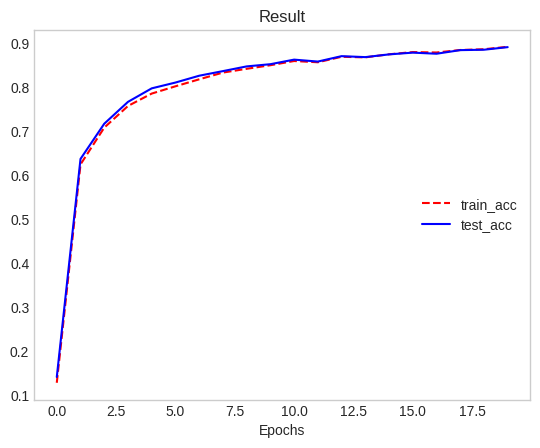

In [123]:
plt.plot(np.arange(1000 // 50), train_acc_list, 'r--', label='train_acc')
plt.plot(np.arange(1000 // 50), test_acc_list, 'b', label='test_acc')

plt.title('Result')
plt.xlabel('Epochs')
plt.legend(loc=5)
plt.grid()
plt.show()

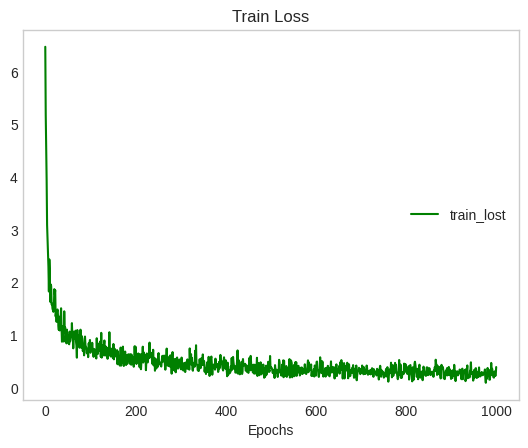

In [124]:
plt.plot(np.arange(1000), train_loss_list, 'green', label='train_lost')

plt.title('Train Loss')
plt.xlabel('Epochs')
plt.legend(loc=5)
plt.grid()
plt.show()